# Projeto - Introdução ao Processamento Digital de Imagens.
---
🧑 **Aluno** : Gustavo Henrique da silva Costa Araujo  

🎓 **Matéria** : Introdução ao Processamento Digital de Imagens  

🏫 **Instituição** : Universidade Federal da Paraíba – Centro de Informática  

📅 **Data** : Março de 2025  

---





instalação das bibliotecas necessárias, caso não tenha baixado ainda.

In [1]:
!pip install opencv-python numpy matplotlib


Para começar, importamos as bibliotecas necessárias:
---

cv2:  para carregar e processar imagens.

numpy: para operações matriciais, essenciais para filtros e convoluções.

matplotlib.pyplot: para exibição das imagens.

scipy.signal.correlate2d: para realizar a correlação bidimensional.

In [2]:
from google.colab import files  # Importa a funcionalidade de upload
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate2d

In [3]:
# 📌 Função para carregar imagens
def carregar_imagem(caminho):
    """Carrega a imagem em RGB a partir do arquivo especificado."""
    img = cv2.imread(caminho, cv2.IMREAD_COLOR)  # Carregar em formato BGR
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Converter para RGB

# 📌 Função para carregar filtros de arquivos .txt
def carregar_filtro(arquivo):
    """Lê um filtro de um arquivo .txt e retorna como matriz NumPy."""
    with open(arquivo, "r") as f:
        filtro = [list(map(float, linha.split())) for linha in f.readlines()]
    return np.array(filtro)

# 📌 Função para aplicar filtro (convolução) separadamente nos canais RGB
def aplicar_filtro(img, filtro, normalizar_sobel=False):
    """Aplica um filtro convolucional em cada acanal RGB da imagem."""
    img_filtrada = np.zeros_like(img, dtype=np.float32)  # Usa float para evitar estouro

    for i in range(3):  # Aplica o filtro separadamente em R, G e B
        img_filtrada[:, :, i] = cv2.filter2D(img[:, :, i], -1, filtro)

    if normalizar_sobel:
        # Passo 1: Aplicar valor absoluto
        img_filtrada = np.abs(img_filtrada)

        # Passo 2: Normalizar para [0, 255]
        img_filtrada = 255 * (img_filtrada - img_filtrada.min()) / (img_filtrada.max() - img_filtrada.min())

    return np.clip(img_filtrada, 0, 255).astype(np.uint8)

# Função para aplicar correlação em cada canal R, G e B
def aplicar_correlacao(image, kernel):
    # Separar canais
    R, G, B = cv2.split(image)

    # Aplicar correlação em cada canal separadamente
    R_corr = correlate2d(R, kernel, mode='same', boundary='symm')
    G_corr = correlate2d(G, kernel, mode='same', boundary='symm')
    B_corr = correlate2d(B, kernel, mode='same', boundary='symm')

    # Normalizar valores para faixa [0, 255]
    def normalize(channel):
        channel = np.clip(channel, 0, 255)  # Limita valores entre 0 e 255
        return channel.astype(np.uint8)

    R_corr = normalize(R_corr)
    G_corr = normalize(G_corr)
    B_corr = normalize(B_corr)

    # Reunir canais
    return cv2.merge([R_corr, G_corr, B_corr])


Filtros escolhidos.

In [4]:
# 📌 Criar e salvar filtros em arquivos .txt
filtros = {
    "gaussiano5x5.txt": [
        [0.005, 0.025, 0.040, 0.025, 0.005],
        [0.025, 0.125, 0.200, 0.125, 0.025],
        [0.040, 0.200, 0.325, 0.200, 0.040],
        [0.025, 0.125, 0.200, 0.125, 0.025],
        [0.005, 0.025, 0.040, 0.025, 0.005]
    ],
    "box_1x10.txt": [[0.1] * 10],
    "box_10x1.txt": [[0.1]] * 10,
    "box_10x10.txt": [[1 / 100] * 10 for _ in range(10)],
    "sobel_horizontal.txt": [
        [-0.5, 0, 0.5],  # Valores suavizados
        [-1, 0, 1],
        [-0.5, 0, 0.5]
    ],
    "sobel_vertical.txt": [
        [-0.25, -0.5, -0.25],  # Suavizado
        [0, 0, 0],
        [0.25, 0.5, 0.25]
    ],
    "box_5x5x3.txt": [[0.05] * 5 for _ in range(5)]
}


# Salvar filtros em arquivos
for nome_arquivo, filtro in filtros.items():
    with open(nome_arquivo, "w") as f:
        for linha in filtro:
            f.write(" ".join(map(str, linha)) + "\n")

print("✅ Filtros salvos com sucesso!")

✅ Filtros salvos com sucesso!


In [5]:
# 📌 Lista de filtros que serão aplicados
arquivos_filtros = [
    "gaussiano5x5.txt", "box_1x10.txt", "box_10x1.txt",
    "box_10x10.txt", "sobel_horizontal.txt", "sobel_vertical.txt"
]
nomes_filtros = [
    "Gaussiano 5x5", "Box 1x10", "Box 10x1",
    "Box 10x10", "Sobel Horizontal", "Sobel Vertical"
]

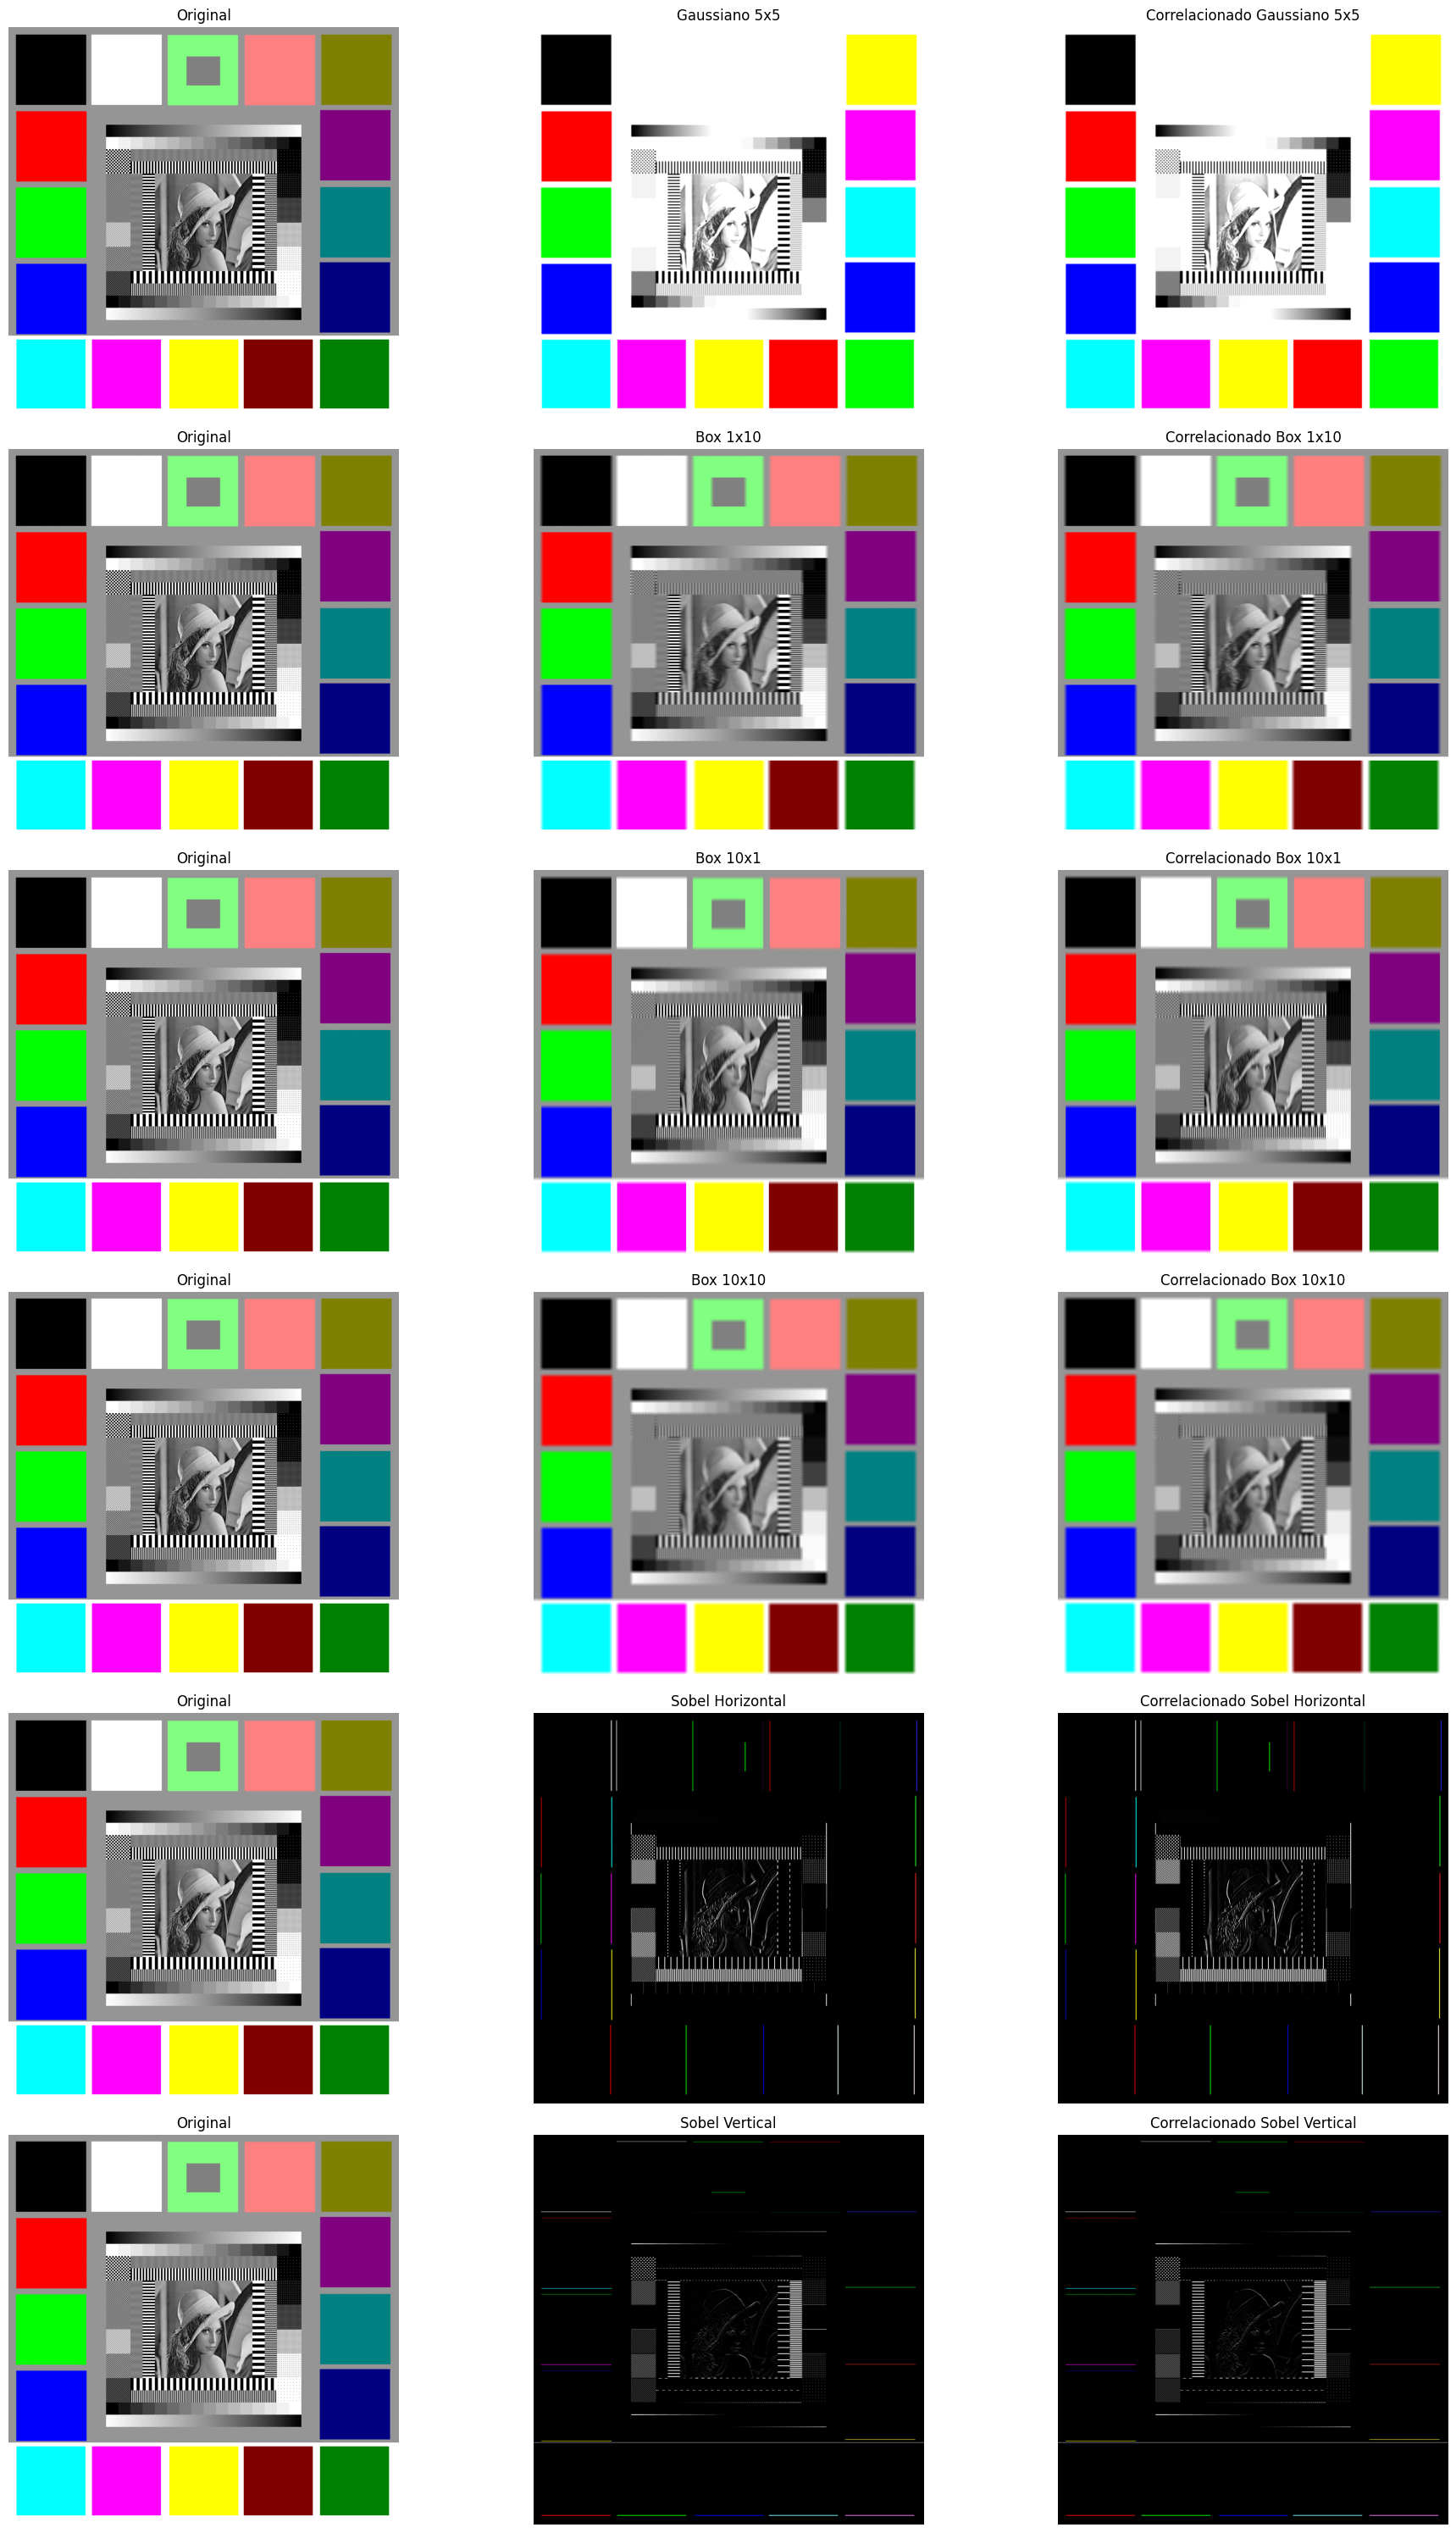

In [7]:
# 📌 Carregar e exibir imagens filtradas
img_original = carregar_imagem("colortest.tif")  # Carregar a imagem uma única vez

# 📌 Criar lista de imagens filtradas (começa com a original)
imagens_filtradas = [img_original]
titulos = ["Original"]

# Aplicar cada filtro e armazenar a imagem resultante
for nome, arquivo in zip(nomes_filtros, arquivos_filtros):
    filtro = carregar_filtro(arquivo)

    # Para filtros de Sobel, aplicamos a normalização necessária
    normalizar = "sobel" in nome.lower()
    img_filtrada = aplicar_filtro(img_original, filtro, normalizar_sobel=normalizar)

    imagens_filtradas.append(img_filtrada)
    titulos.append(nome)

# 📌 Carregar e exibir imagens filtradas usando correlação
imagens_correlacao = [img_original]
titulos_correlacao = ["Original"]

for nome, arquivo in zip(nomes_filtros, arquivos_filtros):
    filtro = carregar_filtro(arquivo)

    # Aplicar correlação nos canais R, G e B
    img_correlacionada = aplicar_correlacao(img_original, filtro)

    imagens_correlacao.append(img_correlacionada)
    titulos_correlacao.append(f"Correlacionado {nome}")

# 📌 Exibir imagens da convolução e da correlação lado a lado
# Ajustar o número de colunas para 3 (Original, Filtrada, Correlacionada)
num_filtros = len(nomes_filtros)

# Agora criamos um grid com 3 colunas: original, filtrada e correlacionada
fig, axes = plt.subplots(num_filtros, 3, figsize=(20, num_filtros * 5))  # 3 colunas por linha

# Exibir a imagem original, a filtrada e a correlacionada para cada filtro
for i in range(num_filtros):
    # Exibir a imagem original na primeira coluna
    axes[i, 0].imshow(imagens_filtradas[0])  # Exibe a imagem original
    axes[i, 0].set_title(titulos[0])
    axes[i, 0].axis("off")

    # Exibir a imagem filtrada na segunda coluna
    axes[i, 1].imshow(imagens_filtradas[i + 1])  # Exibe a imagem filtrada (começa a partir do filtro 1)
    axes[i, 1].set_title(titulos[i + 1])
    axes[i, 1].axis("off")

    # Exibir a imagem correlacionada na terceira coluna
    axes[i, 2].imshow(imagens_correlacao[i + 1])  # Exibe a imagem correlacionada (começa a partir do filtro 1)
    axes[i, 2].set_title(titulos_correlacao[i + 1])
    axes[i, 2].axis("off")

plt.tight_layout()
plt.show()

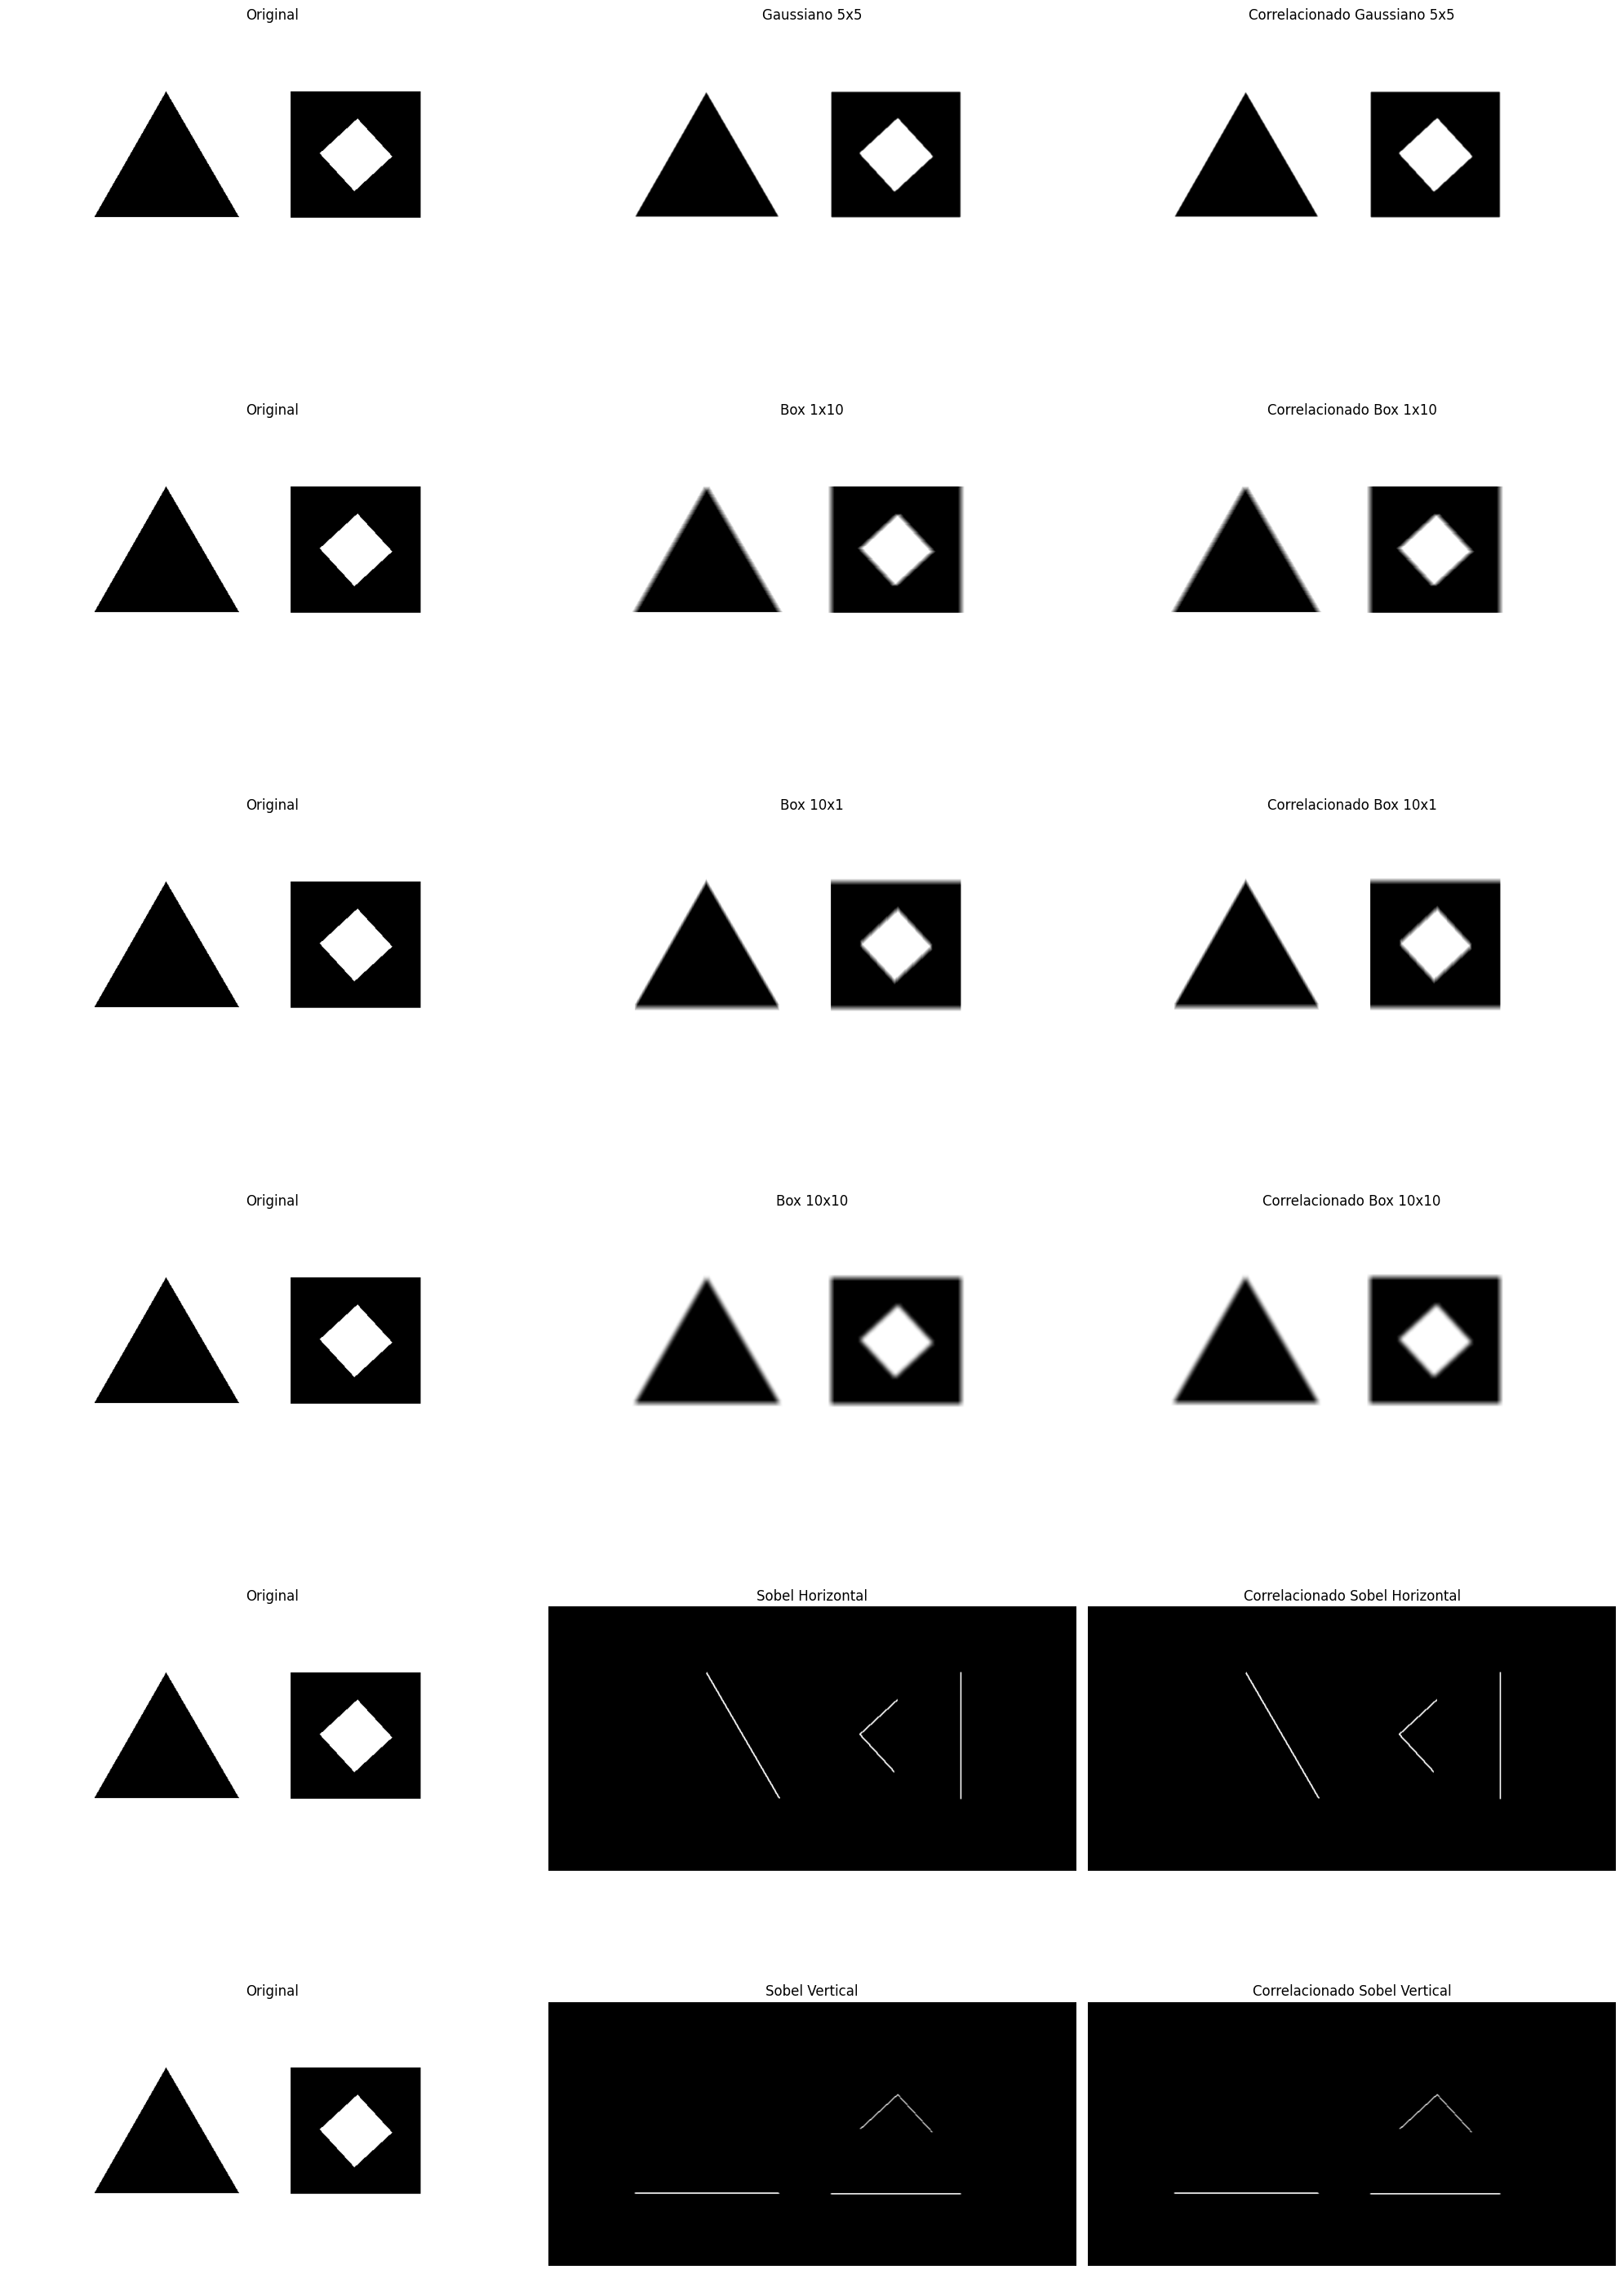

In [8]:
# 📌 Carregar e exibir imagens filtradas
img_original = carregar_imagem("Shapes.png")  # Carregar a imagem uma única vez

# 📌 Criar lista de imagens filtradas (começa com a original)
imagens_filtradas = [img_original]
titulos = ["Original"]

# Aplicar cada filtro e armazenar a imagem resultante
for nome, arquivo in zip(nomes_filtros, arquivos_filtros):
    filtro = carregar_filtro(arquivo)

    # Para filtros de Sobel, aplicamos a normalização necessária
    normalizar = "sobel" in nome.lower()
    img_filtrada = aplicar_filtro(img_original, filtro, normalizar_sobel=normalizar)

    imagens_filtradas.append(img_filtrada)
    titulos.append(nome)

# 📌 Carregar e exibir imagens filtradas usando correlação
imagens_correlacao = [img_original]
titulos_correlacao = ["Original"]

for nome, arquivo in zip(nomes_filtros, arquivos_filtros):
    filtro = carregar_filtro(arquivo)

    # Aplicar correlação nos canais R, G e B
    img_correlacionada = aplicar_correlacao(img_original, filtro)

    imagens_correlacao.append(img_correlacionada)
    titulos_correlacao.append(f"Correlacionado {nome}")

# 📌 Exibir imagens da convolução e da correlação lado a lado
# Ajustar o número de colunas para 3 (Original, Filtrada, Correlacionada)
num_filtros = len(nomes_filtros)

# Agora criamos um grid com 3 colunas: original, filtrada e correlacionada
fig, axes = plt.subplots(num_filtros, 3, figsize=(20, num_filtros * 5))  # 3 colunas por linha

# Exibir a imagem original, a filtrada e a correlacionada para cada filtro
for i in range(num_filtros):
    # Exibir a imagem original na primeira coluna
    axes[i, 0].imshow(imagens_filtradas[0])  # Exibe a imagem original
    axes[i, 0].set_title(titulos[0])
    axes[i, 0].axis("off")

    # Exibir a imagem filtrada na segunda coluna
    axes[i, 1].imshow(imagens_filtradas[i + 1])  # Exibe a imagem filtrada (começa a partir do filtro 1)
    axes[i, 1].set_title(titulos[i + 1])
    axes[i, 1].axis("off")

    # Exibir a imagem correlacionada na terceira coluna
    axes[i, 2].imshow(imagens_correlacao[i + 1])  # Exibe a imagem correlacionada (começa a partir do filtro 1)
    axes[i, 2].set_title(titulos_correlacao[i + 1])
    axes[i, 2].axis("off")

plt.tight_layout()
plt.show()

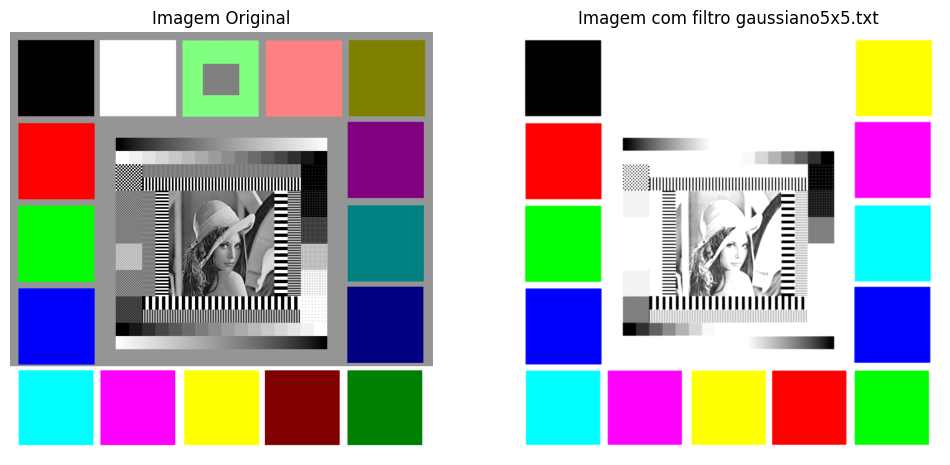

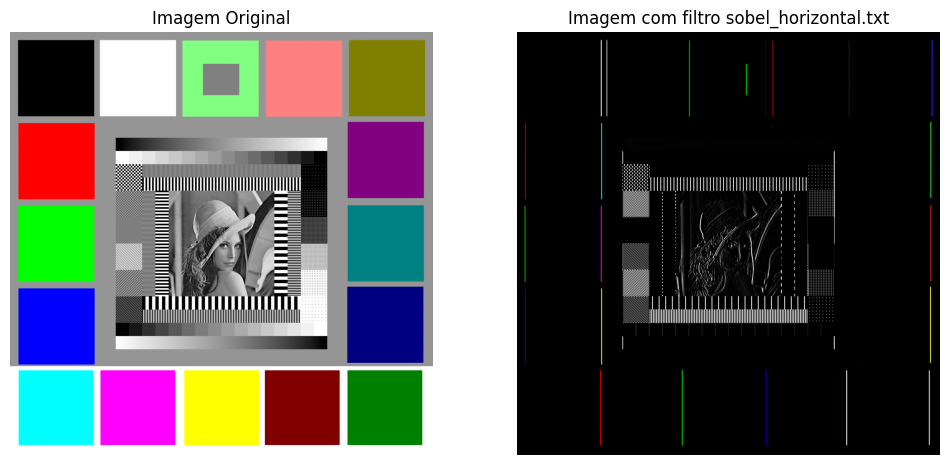

In [9]:
# 📌 Função ReLU
def relu(x):
    """Aplica a função de ativação ReLU."""
    return np.maximum(0, x)

# 📌 Função para aplicar correlação com offset, passo e ReLU
def aplicar_correlacao_com_relu(image, kernel, offset=0, passo=1):
    """Aplica correlação bidimensional com a função ReLU nos canais R, G e B."""
    R, G, B = cv2.split(image)

    # Aplicando correlação nos três canais
    R_corr = correlate2d(R, kernel, mode='same', boundary='symm')[::passo, ::passo] + offset
    G_corr = correlate2d(G, kernel, mode='same', boundary='symm')[::passo, ::passo] + offset
    B_corr = correlate2d(B, kernel, mode='same', boundary='symm')[::passo, ::passo] + offset

    # Aplicando ReLU em cada canal
    R_corr = relu(R_corr)
    G_corr = relu(G_corr)
    B_corr = relu(B_corr)

    # Normalizando os valores para [0, 255]
    def normalize(channel):
        channel = np.clip(channel, 0, 255)
        return channel.astype(np.uint8)

    R_corr = normalize(R_corr)
    G_corr = normalize(G_corr)
    B_corr = normalize(B_corr)

    return cv2.merge([R_corr, G_corr, B_corr])

# 📌 Carregar e aplicar filtros com ReLU nos exemplos fornecidos
img = carregar_imagem("colortest.tif")  # Substitua pelo caminho da sua imagem
filtros = [
    "gaussiano5x5.txt", "sobel_horizontal.txt"
]

# Definir parâmetros do offset e do passo
offset = 50  # Valor de exemplo para offset
passo = 2    # Valor de exemplo para passo

# Exibição das imagens original vs filtrada
for filtro_nome in filtros:
    filtro = carregar_filtro(filtro_nome)
    normalizar_sobel = "sobel" in filtro_nome.lower()
    img_filtrada = aplicar_filtro(img, filtro, normalizar_sobel=normalizar_sobel)

    # Exibição lado a lado: Original vs Filtrada
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    # Imagem original
    ax[0].imshow(img)
    ax[0].set_title("Imagem Original")
    ax[0].axis("off")

    # Imagem filtrada
    ax[1].imshow(img_filtrada)
    ax[1].set_title(f"Imagem com filtro {filtro_nome}")
    ax[1].axis("off")

    plt.show()

In [10]:
# 📌 Criar e salvar filtros em arquivos .txt
filtros = {
    "box_5x5x3.txt": [
        [0.04, 0.04, 0.04, 0.04, 0.04],
        [0.04, 0.10, 0.10, 0.10, 0.04],
        [0.04, 0.10, 0.10, 0.10, 0.04],
        [0.04, 0.10, 0.10, 0.10, 0.04],
        [0.04, 0.04, 0.04, 0.04, 0.04]
    ],  # Filtro Box 5x5x3 (valores somando 1 para suavização)

    "sobel_horizontal_3x3x3.txt": [
        [-1, 0, 1],
        [-2, 0, 2],
        [-1, 0, 1]
    ]  # Filtro Sobel Horizontal 3x3 replicado nos 3 canais (RGB)
}

# Salvar filtros em arquivos
for nome_arquivo, filtro in filtros.items():
    with open(nome_arquivo, "w") as f:
        for linha in filtro:
            f.write(" ".join(map(str, linha)) + "\n")

print("✅ Filtros salvos com sucesso!")


✅ Filtros salvos com sucesso!


Aplicando filtro Box 5x5x3...


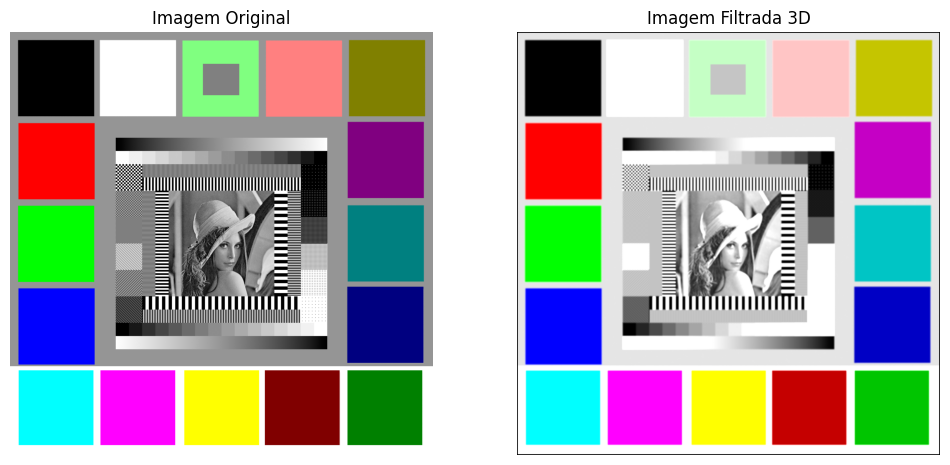

Aplicando filtro Sobel Horizontal 3x3x3...


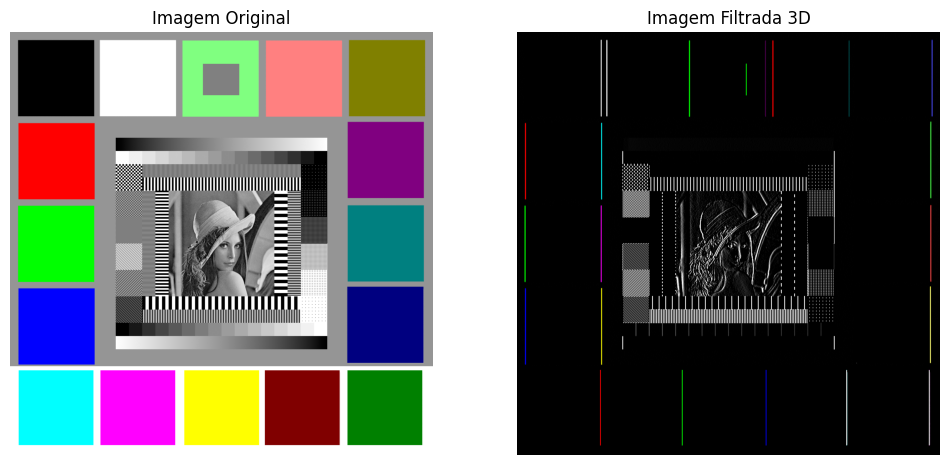

In [11]:
# 📌 Função para carregar filtro 3D de arquivos .txt
def carregar_filtro_3d(arquivo):
    """Lê um filtro 3D de um arquivo .txt e retorna como matriz NumPy."""
    with open(arquivo, "r") as f:
        linhas = f.readlines()

    filtro = np.array([list(map(float, linha.split())) for linha in linhas])

    # Se o filtro for 2D, replicar para 3D (ex: para Sobel Horizontal)
    if filtro.ndim == 2:
        filtro = np.repeat(filtro[:, :, np.newaxis], 3, axis=2)

    return filtro

# 📌 Função para aplicar correlação 3D na imagem
def aplicar_correlacao_3d(img, filtro):
    """Aplica a correlação 3D no volume RGB da imagem."""
    f_h, f_w, f_d = filtro.shape  # Dimensões do filtro 3D
    img_filtrada = np.zeros_like(img, dtype=np.float32)  # Inicializa a imagem filtrada

    # Loop sobre a imagem e aplicar a correlação 3D
    for i in range(f_h // 2, img.shape[0] - f_h // 2):
        for j in range(f_w // 2, img.shape[1] - f_w // 2):
            for k in range(3):  # Para cada canal (R, G, B)
                # Extrair a sub-imagem (janela) correspondente ao filtro
                sub_imagem = img[i - f_h // 2:i + f_h // 2 + 1, j - f_w // 2:j + f_w // 2 + 1, k]
                img_filtrada[i, j, k] = np.sum(sub_imagem * filtro[:, :, k])

    # Clipa para garantir valores válidos entre 0 e 255
    return np.clip(img_filtrada, 0, 255).astype(np.uint8)

# 📌 Função para aplicar a correlação 3D e visualizar as imagens
def aplicar_e_visualizar_filtros_3d(img, filtro):
    """Aplica o filtro 3D e exibe a imagem original vs filtrada."""
    img_filtrada = aplicar_correlacao_3d(img, filtro)

    # Exibição lado a lado: Imagem Original vs Filtrada
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    # Imagem original
    ax[0].imshow(img)
    ax[0].set_title("Imagem Original")
    ax[0].axis("off")

    # Imagem filtrada
    ax[1].imshow(img_filtrada)
    ax[1].set_title("Imagem Filtrada 3D")
    ax[1].axis("off")

    plt.show()

# 📌 Testar com filtros Box 5x5x3 e Sobel Horizontal 3x3x3
def testar_filtros_3d(caminho_imagem):
    """Testa a aplicação de filtros Box e Sobel Horizontal em uma imagem fornecida."""
    # Carregar imagem
    img = carregar_imagem(caminho_imagem)

    # Carregar filtros 3D
    filtro_box_5x5x3 = carregar_filtro_3d("box_5x5x3.txt")
    filtro_sobel_3x3x3 = carregar_filtro_3d("sobel_horizontal_3x3x3.txt")

    # Aplicar e visualizar filtros
    print("Aplicando filtro Box 5x5x3...")
    aplicar_e_visualizar_filtros_3d(img, filtro_box_5x5x3)

    print("Aplicando filtro Sobel Horizontal 3x3x3...")
    aplicar_e_visualizar_filtros_3d(img, filtro_sobel_3x3x3)

# 📌 Caminho da imagem para teste
caminho_imagem = "colortest.tif"  # Substitua com o caminho correto da sua imagem

# Testar a aplicação de filtros 3D
testar_filtros_3d(caminho_imagem)

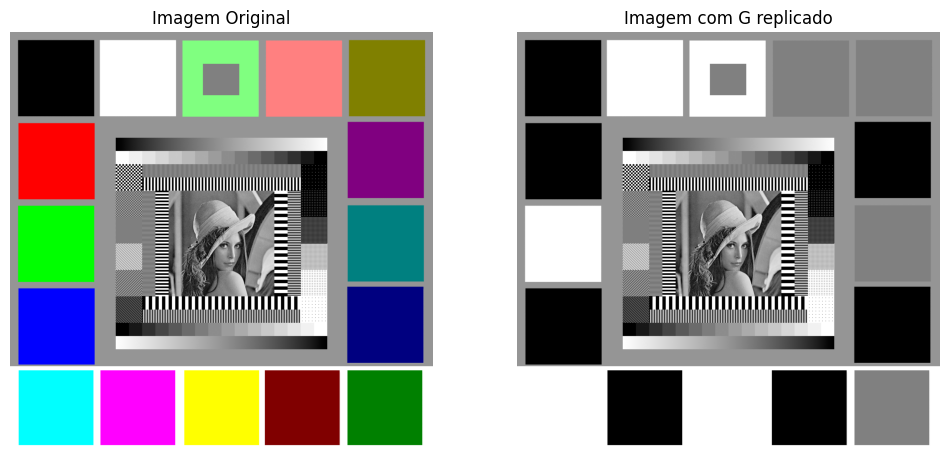

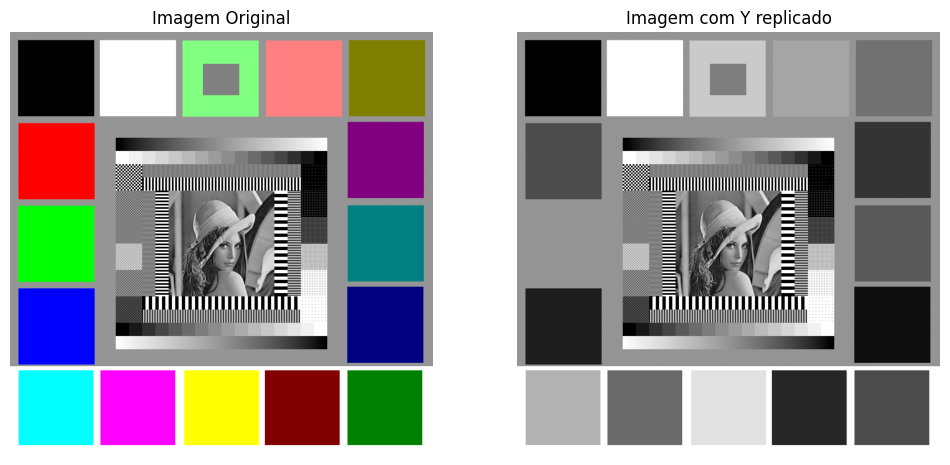

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# 📌 Função para converter RGB para tons de cinza replicando a banda G
def rgb_para_g_replicado(img):
    """Converte a imagem RGB para tons de cinza replicando o canal G em R e B."""
    img_gray = np.copy(img)
    img_gray[:, :, 0] = img[:, :, 1]  # Replicar G em R
    img_gray[:, :, 2] = img[:, :, 1]  # Replicar G em B

    # Garantir que os valores fiquem na faixa [0, 255] e converter para uint8
    img_gray = np.clip(img_gray, 0, 255)

    return img_gray

# 📌 Função para converter RGB para YIQ e replicar Y
def rgb_para_y_replicado(img):
    """Converte a imagem RGB para YIQ e replica a banda Y em R, G e B."""
    # Transformação RGB -> YIQ
    R, G, B = img[:, :, 0], img[:, :, 1], img[:, :, 2]
    Y = 0.299 * R + 0.587 * G + 0.114 * B  # Calcula Y

    # Replicar Y nos canais R, G e B
    img_y = np.stack([Y, Y, Y], axis=-1)

    # Garantir que os valores fiquem na faixa [0, 255] e converter para uint8
    img_y = np.clip(img_y, 0, 255).astype(np.uint8)

    return img_y

# 📌 Função para exibir as imagens originais e convertidas
def exibir_imagens(imagem_original, imagem_convertida, titulo_original, titulo_convertida):
    """Exibe a imagem original e a convertida lado a lado."""
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    # Imagem original
    ax[0].imshow(imagem_original)
    ax[0].set_title(titulo_original)
    ax[0].axis('off')

    # Imagem convertida
    ax[1].imshow(imagem_convertida)
    ax[1].set_title(titulo_convertida)
    ax[1].axis('off')

    plt.show()

# 📌 Função para carregar a imagem (ajuste conforme a sua necessidade)
def carregar_imagem(caminho):
    """Carrega a imagem a partir de um arquivo (ajuste conforme a sua necessidade)."""
    return plt.imread(caminho)

# 📌 Função para testar as conversões
def testar_conversoes(caminho_imagem):
    """Testa as conversões para tons de cinza."""
    # Carregar imagem
    img = carregar_imagem(caminho_imagem)

    # (a) Replicando o canal G em R e B
    img_g_replicado = rgb_para_g_replicado(img)
    exibir_imagens(img, img_g_replicado, "Imagem Original", "Imagem com G replicado")

    # (b) Replicando a banda Y do sistema YIQ
    img_y_replicado = rgb_para_y_replicado(img)
    exibir_imagens(img, img_y_replicado, "Imagem Original", "Imagem com Y replicado")

# 📌 Caminho da imagem para teste
caminho_imagem = "colortest.tif"  # Substitua com o caminho correto da sua imagem

# Testar as conversões
testar_conversoes(caminho_imagem)
